# ML models to built crash severity-Logistic Regression

Load Data


In [251]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from tabulate import tabulate
df = pd.read_csv("C:\\Users\\Vrinda\\Downloads\\traffic_accidents.csv")
df.head(5)

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12
3,08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8


In [118]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209306 entries, 0 to 209305
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   crash_date                     209306 non-null  object 
 1   traffic_control_device         209306 non-null  object 
 2   weather_condition              209306 non-null  object 
 3   lighting_condition             209306 non-null  object 
 4   first_crash_type               209306 non-null  object 
 5   trafficway_type                209306 non-null  object 
 6   alignment                      209306 non-null  object 
 7   roadway_surface_cond           209306 non-null  object 
 8   road_defect                    209306 non-null  object 
 9   crash_type                     209306 non-null  object 
 10  intersection_related_i         209306 non-null  object 
 11  damage                         209306 non-null  object 
 12  prim_contributory_cause       

In [119]:
df.describe()


,num_units,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
count,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000
mean,2.063300,0.382717,0.001859,0.038102,0.221241,0.121516,2.244002,13.373047,4.144024,6.771822
std,0.396012,0.799720,0.047502,0.233964,0.614960,0.450865,1.241175,5.603830,1.966864,3.427593
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,9.000000,2.000000,4.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,14.000000,4.000000,7.000000
75%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,17.000000,6.000000,10.000000
max,11.000000,21.000000,3.000000,7.000000,21.000000,15.000000,49.000000,23.000000,7.000000,12.000000


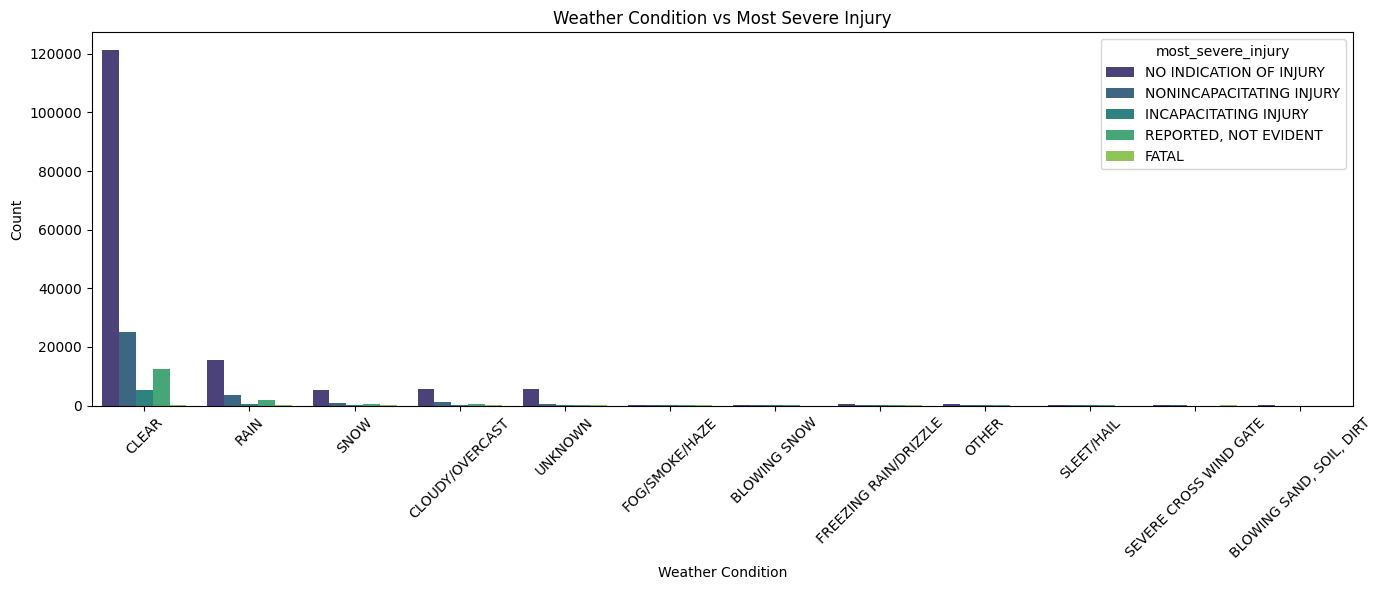

In [255]:
plt.figure(figsize=(14,6))
sns.countplot(data=df, x='weather_condition', hue='most_severe_injury', palette='viridis')
plt.title('Weather Condition vs Most Severe Injury')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


EDA

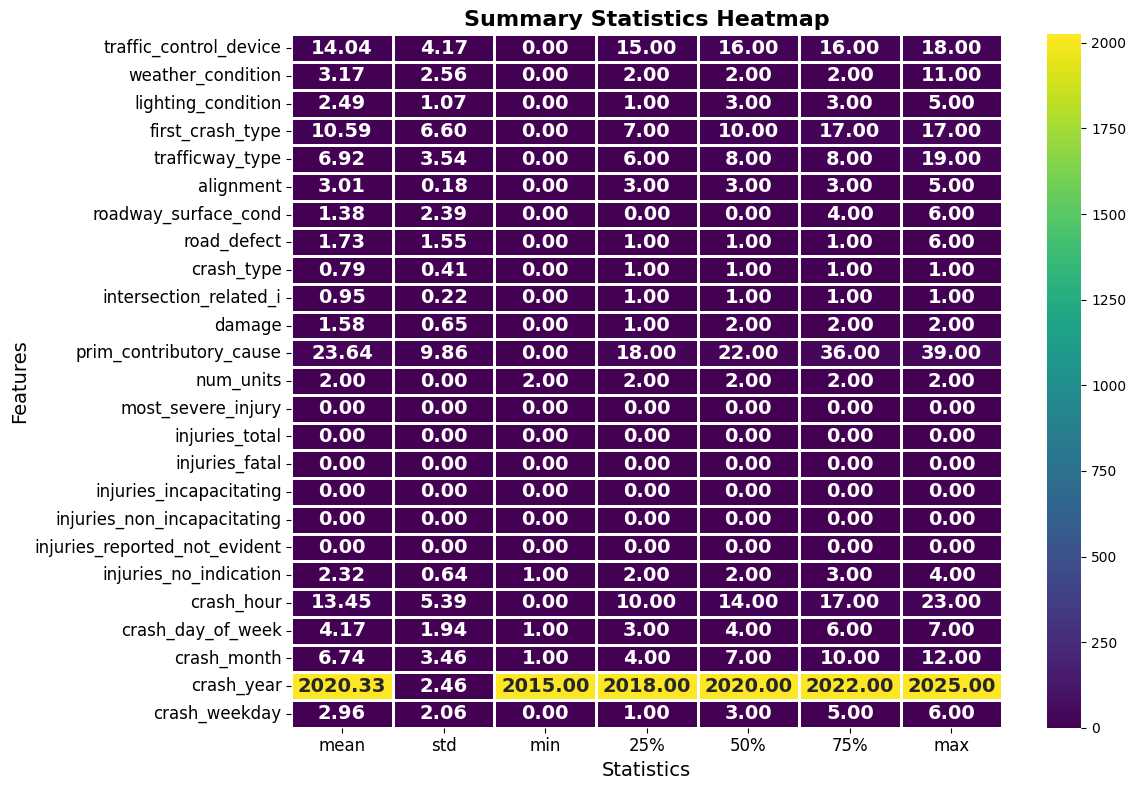

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

desc = df.describe().T

plt.figure(figsize=(12, 8))
sns.heatmap(desc[['mean', 'std', 'min', '25%', '50%', '75%', 'max']], 
            annot=True, fmt='.2f', cmap='viridis', cbar=True, 
            annot_kws={"size": 14, 'weight': 'bold'}, 
            linewidths=0.8, linecolor='white')

plt.title('Summary Statistics Heatmap', fontsize=16, weight='bold')
plt.xlabel('Statistics', fontsize=14)
plt.ylabel('Features', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show plot
plt.tight_layout()  
plt.show()


In [137]:
#Missing data
df.isnull()


,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209301,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
209302,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
209303,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
209304,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check for missing values
print("Missing values:\n", df.isnull().sum())



Missing values:
 crash_date                       0
traffic_control_device           0
weather_condition                0
lighting_condition               0
first_crash_type                 0
trafficway_type                  0
alignment                        0
roadway_surface_cond             0
road_defect                      0
crash_type                       0
intersection_related_i           0
damage                           0
prim_contributory_cause          0
num_units                        0
most_severe_injury               0
injuries_total                   0
injuries_fatal                   0
injuries_incapacitating          0
injuries_non_incapacitating      0
injuries_reported_not_evident    0
injuries_no_indication           0
crash_hour                       0
crash_day_of_week                0
crash_month                      0
dtype: int64


In [141]:
missing_percentage = df.isnull().mean() * 100

missing_table = pd.DataFrame({
    'Missing Data Percentage (%)': missing_percentage
}).reset_index().rename(columns={'index': 'Column'})

print(tabulate(missing_table, headers='keys', tablefmt='grid', showindex=False))

+-------------------------------+-------------------------------+
| Column                        |   Missing Data Percentage (%) |
+===============================+===============================+
| crash_date                    |                             0 |
+-------------------------------+-------------------------------+
| traffic_control_device        |                             0 |
+-------------------------------+-------------------------------+
| weather_condition             |                             0 |
+-------------------------------+-------------------------------+
| lighting_condition            |                             0 |
+-------------------------------+-------------------------------+
| first_crash_type              |                             0 |
+-------------------------------+-------------------------------+
| trafficway_type               |                             0 |
+-------------------------------+-------------------------------+
| alignmen

In [ ]:
# List of categorical columns
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']

for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())
    print("-" * 50)


Column: crash_date
crash_date
12/29/2020 05:00:00 PM    10
02/17/2022 03:30:00 PM     8
09/11/2019 04:30:00 PM     6
01/12/2019 02:30:00 PM     6
11/26/2018 08:30:00 AM     6
                          ..
04/09/2018 01:15:00 PM     1
01/18/2020 06:30:00 AM     1
06/05/2019 07:49:00 PM     1
03/30/2020 06:30:00 AM     1
06/01/2020 03:23:00 PM     1
Name: count, Length: 189087, dtype: int64
--------------------------------------------------

Column: traffic_control_device
traffic_control_device
TRAFFIC SIGNAL              123944
STOP SIGN/FLASHER            49139
NO CONTROLS                  29508
UNKNOWN                       4455
OTHER                          670
YIELD                          468
PEDESTRIAN CROSSING SIGN       247
OTHER REG. SIGN                181
LANE USE MARKING               153
FLASHING CONTROL SIGNAL        150
POLICE/FLAGMAN                 104
OTHER WARNING SIGN              95
RAILROAD CROSSING GATE          78
SCHOOL ZONE                     33
OTHER RAILRO

In [145]:
# List of numerical columns
numerical_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

# Summary statistics
print(df[numerical_cols].describe())



           num_units  injuries_total  injuries_fatal  injuries_incapacitating  \
count  209306.000000   209306.000000   209306.000000            209306.000000   
mean        2.063300        0.382717        0.001859                 0.038102   
std         0.396012        0.799720        0.047502                 0.233964   
min         1.000000        0.000000        0.000000                 0.000000   
25%         2.000000        0.000000        0.000000                 0.000000   
50%         2.000000        0.000000        0.000000                 0.000000   
75%         2.000000        1.000000        0.000000                 0.000000   
max        11.000000       21.000000        3.000000                 7.000000   

       injuries_non_incapacitating  injuries_reported_not_evident  \
count                209306.000000                  209306.000000   
mean                      0.221241                       0.121516   
std                       0.614960                       0.4508

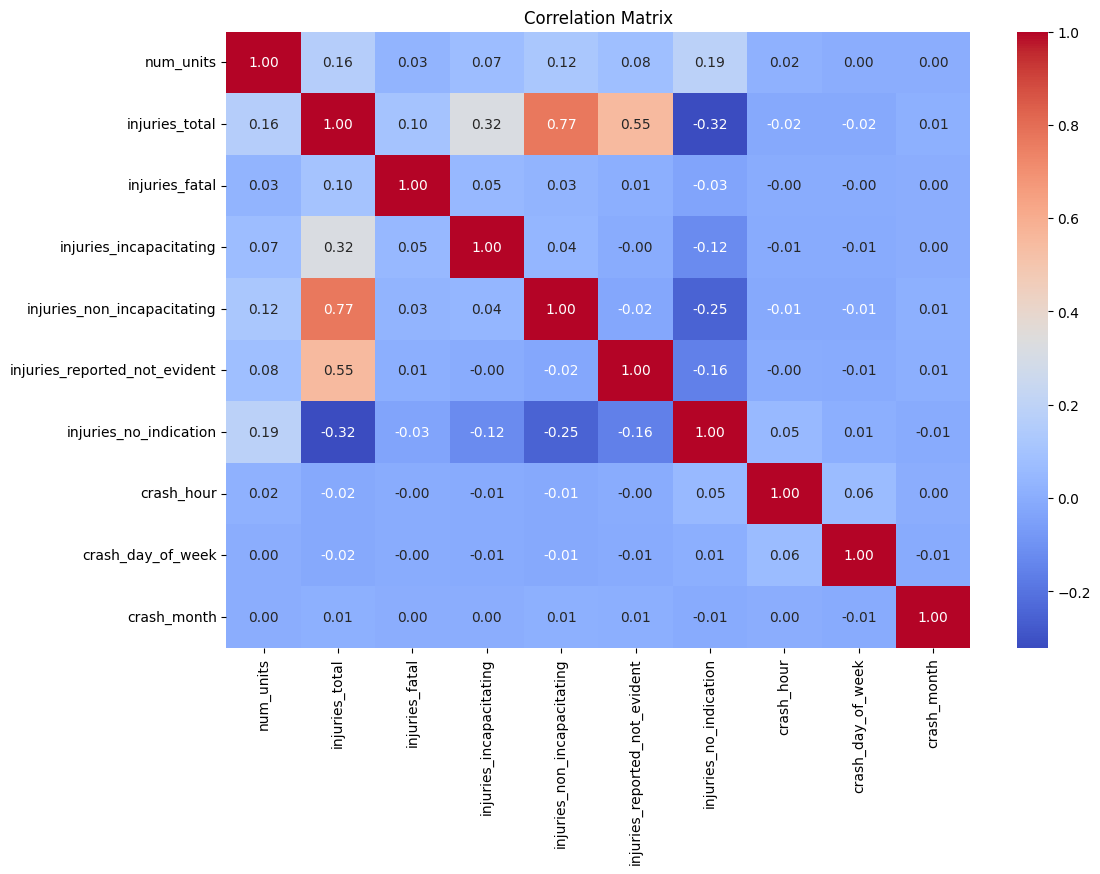

In [ ]:
# Compute the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

C:\Users\Vrinda\AppData\Local\Temp\ipykernel_24876\1932517376.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='crash_hour', order=range(24), palette='viridis')


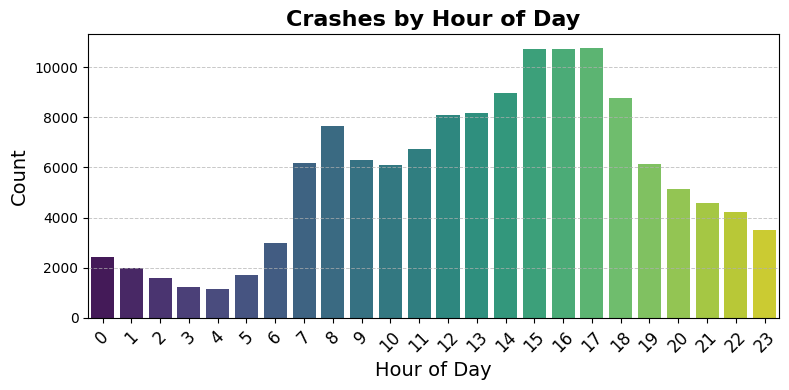

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crash hour analysis
plt.figure(figsize=(8, 4))  # Adjust figure size for clarity

sns.countplot(data=df, x='crash_hour', order=range(24), palette='viridis')

plt.title('Crashes by Hour of Day', fontsize=16, weight='bold')
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.xticks(fontsize=12, rotation=45)  


plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

plt.tight_layout()
plt.show()


C:\Users\Vrinda\AppData\Local\Temp\ipykernel_24876\1376132215.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='crash_day_of_week', order=range(1, 8), palette='viridis')


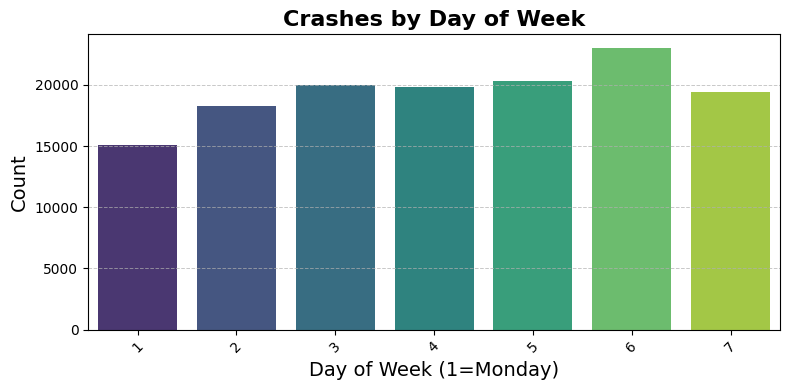

In [ ]:
# Crashes by day of the week
plt.figure(figsize=(8, 4))  

sns.countplot(data=df, x='crash_day_of_week', order=range(1, 8), palette='viridis')

plt.title('Crashes by Day of Week', fontsize=16, weight='bold')
plt.xlabel('Day of Week (1=Monday)', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.xticks(fontsize=10, rotation=45)

plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

plt.tight_layout()
plt.show()


C:\Users\Vrinda\AppData\Local\Temp\ipykernel_24876\3841543344.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='crash_month', order=range(1, 13), palette='viridis')


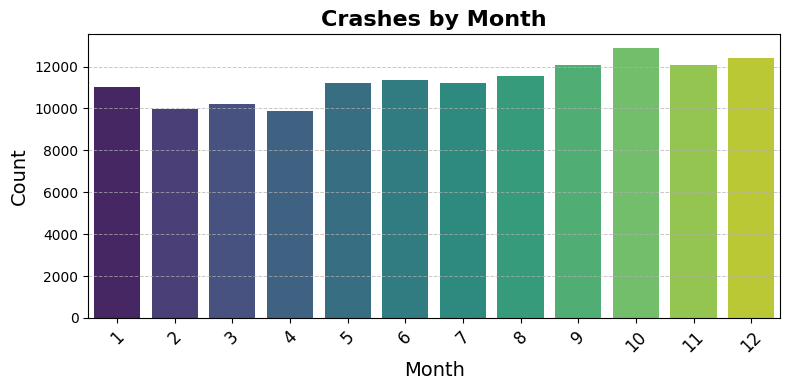

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crashes by month
plt.figure(figsize=(8, 4)) 

sns.countplot(data=df, x='crash_month', order=range(1, 13), palette='viridis')

plt.title('Crashes by Month', fontsize=16, weight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.xticks(fontsize=12, rotation=45)  

plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

plt.tight_layout()
plt.show()


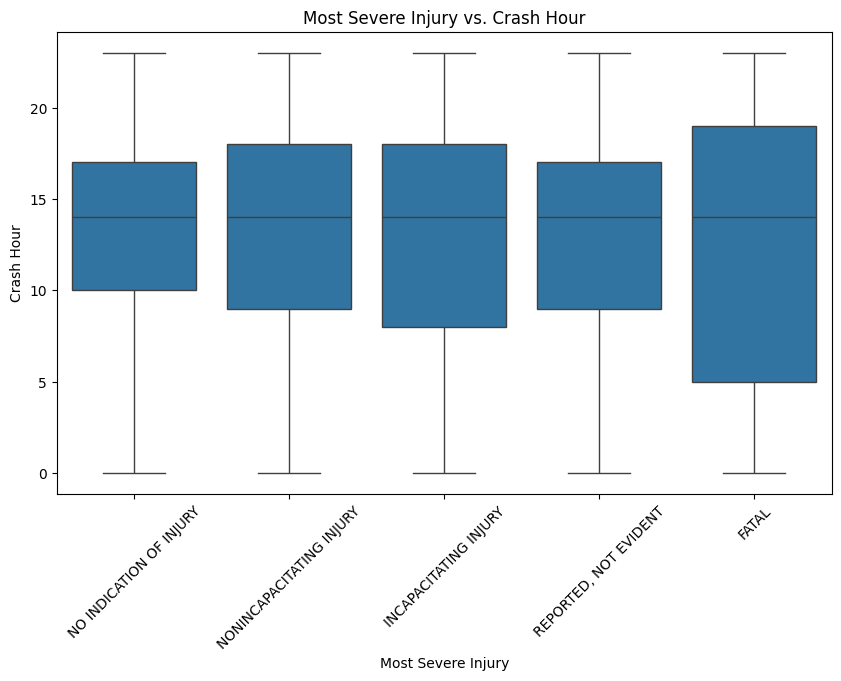

In [155]:
# Severity of injury vs. crash hour
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='most_severe_injury', y='crash_hour')
plt.title('Most Severe Injury vs. Crash Hour')
plt.xlabel('Most Severe Injury')
plt.ylabel('Crash Hour')
plt.xticks(rotation=45)
plt.show()

C:\Users\Vrinda\AppData\Local\Temp\ipykernel_24876\2597066420.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['crash_date'] = pd.to_datetime(df['crash_date'])
C:\Users\Vrinda\AppData\Local\Temp\ipykernel_24876\2597066420.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='crash_year', palette='viridis')


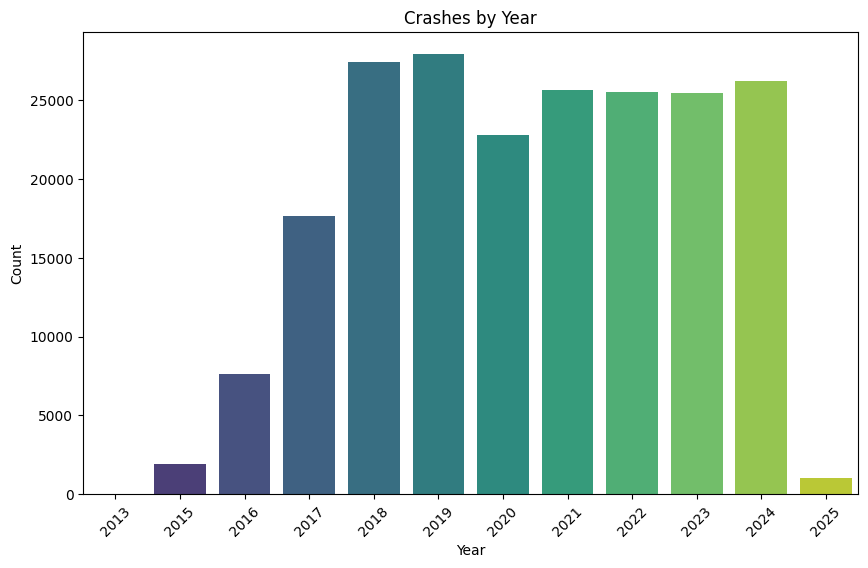

C:\Users\Vrinda\AppData\Local\Temp\ipykernel_24876\2597066420.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='is_weekend', palette='coolwarm')


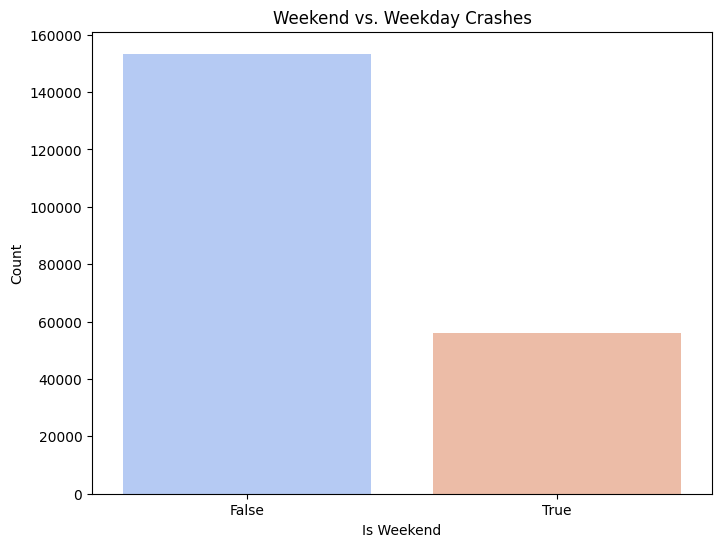

In [ ]:
# Converting crash_date to datetime
df['crash_date'] = pd.to_datetime(df['crash_date'])

# Extract year, month, and weekday
df['crash_year'] = df['crash_date'].dt.year
df['crash_weekday'] = df['crash_date'].dt.day_name()
df['is_weekend'] = df['crash_weekday'].isin(['Saturday', 'Sunday'])

# Plot crashes by year
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='crash_year', palette='viridis')
plt.title('Crashes by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Weekend vs. Weekday Crashes
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='is_weekend', palette='coolwarm')
plt.title('Weekend vs. Weekday Crashes')
plt.xlabel('Is Weekend')
plt.ylabel('Count')
plt.show()

In [241]:
colors = ['#1e2a38', '#3e5968', '#00b8b8', '#006f4f', '#2b3d4f', '#4f6f7e', '#00a5a5', '#005b46', '#284f63', '#5f797b']


C:\Users\Vrinda\AppData\Local\Temp\ipykernel_24876\1496201240.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='crash_type', palette=colors)
C:\Users\Vrinda\AppData\Local\Temp\ipykernel_24876\1496201240.py:3: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(data=df, x='crash_type', palette=colors)


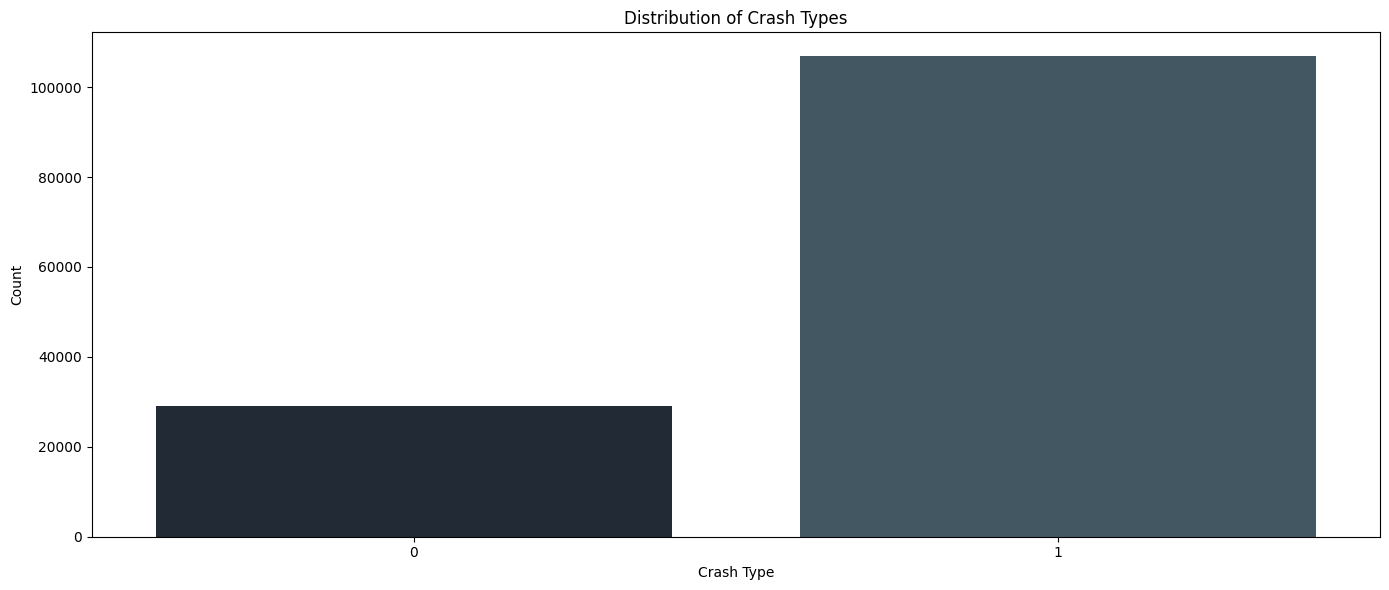

In [242]:
#distribution of crash types
plt.figure(figsize=(14,6))
sns.countplot(data=df, x='crash_type', palette=colors)
plt.title('Distribution of Crash Types')
plt.xlabel('Crash Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

C:\Users\Vrinda\AppData\Local\Temp\ipykernel_24876\946438280.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='crash_hour', palette='viridis')


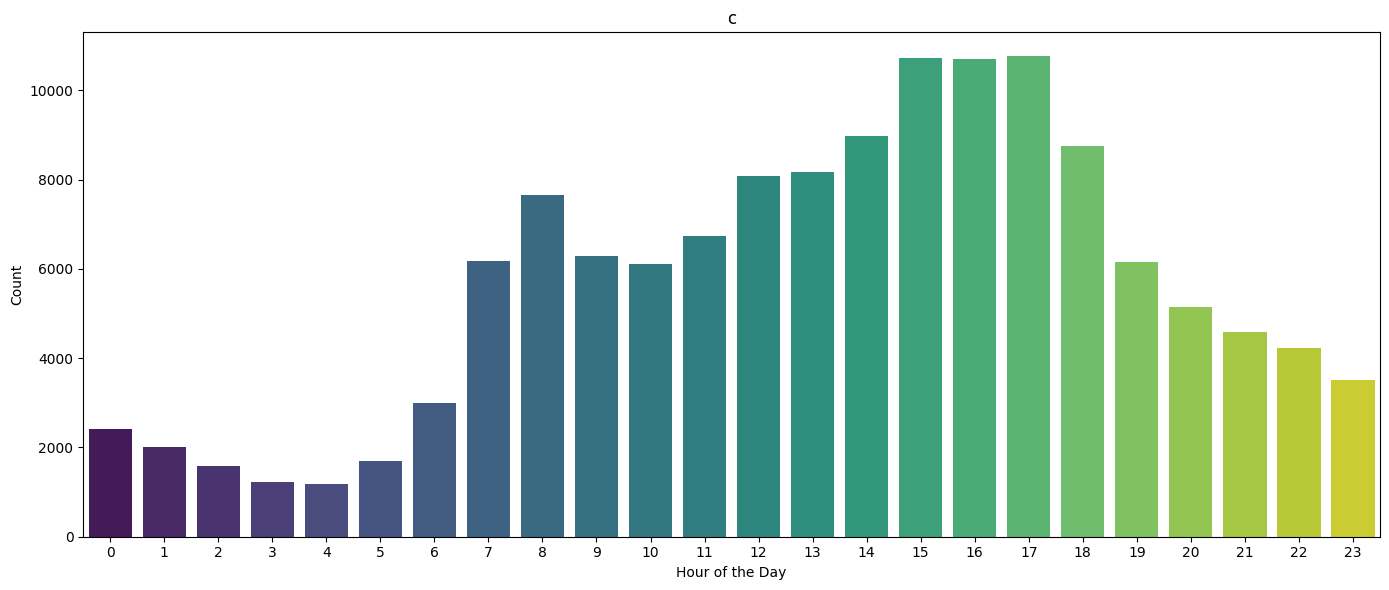

In [249]:
plt.figure(figsize=(14,6))
sns.countplot(data=df, x='crash_hour', palette='viridis')
plt.title('c')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

C:\Users\Vrinda\AppData\Local\Temp\ipykernel_24876\2272707657.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='crash_month', palette='viridis')


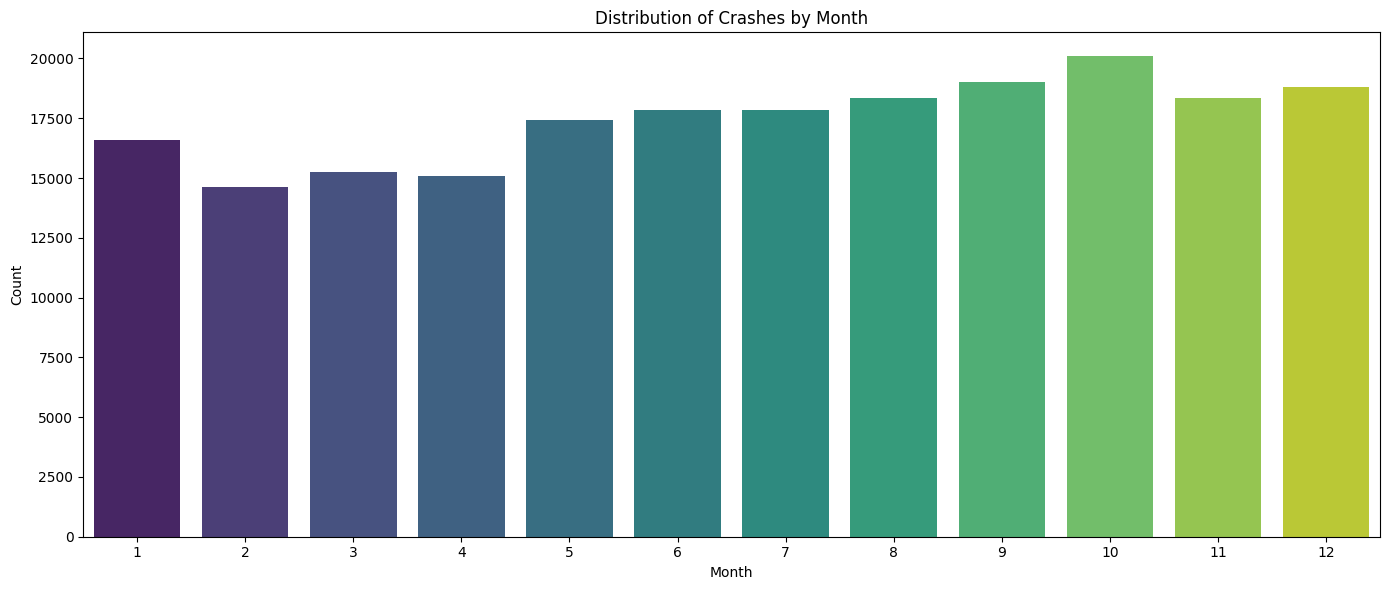

In [253]:
plt.figure(figsize=(14,6))
sns.countplot(data=df, x='crash_month', palette='viridis')
plt.title('Distribution of Crashes by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Data preprocessing

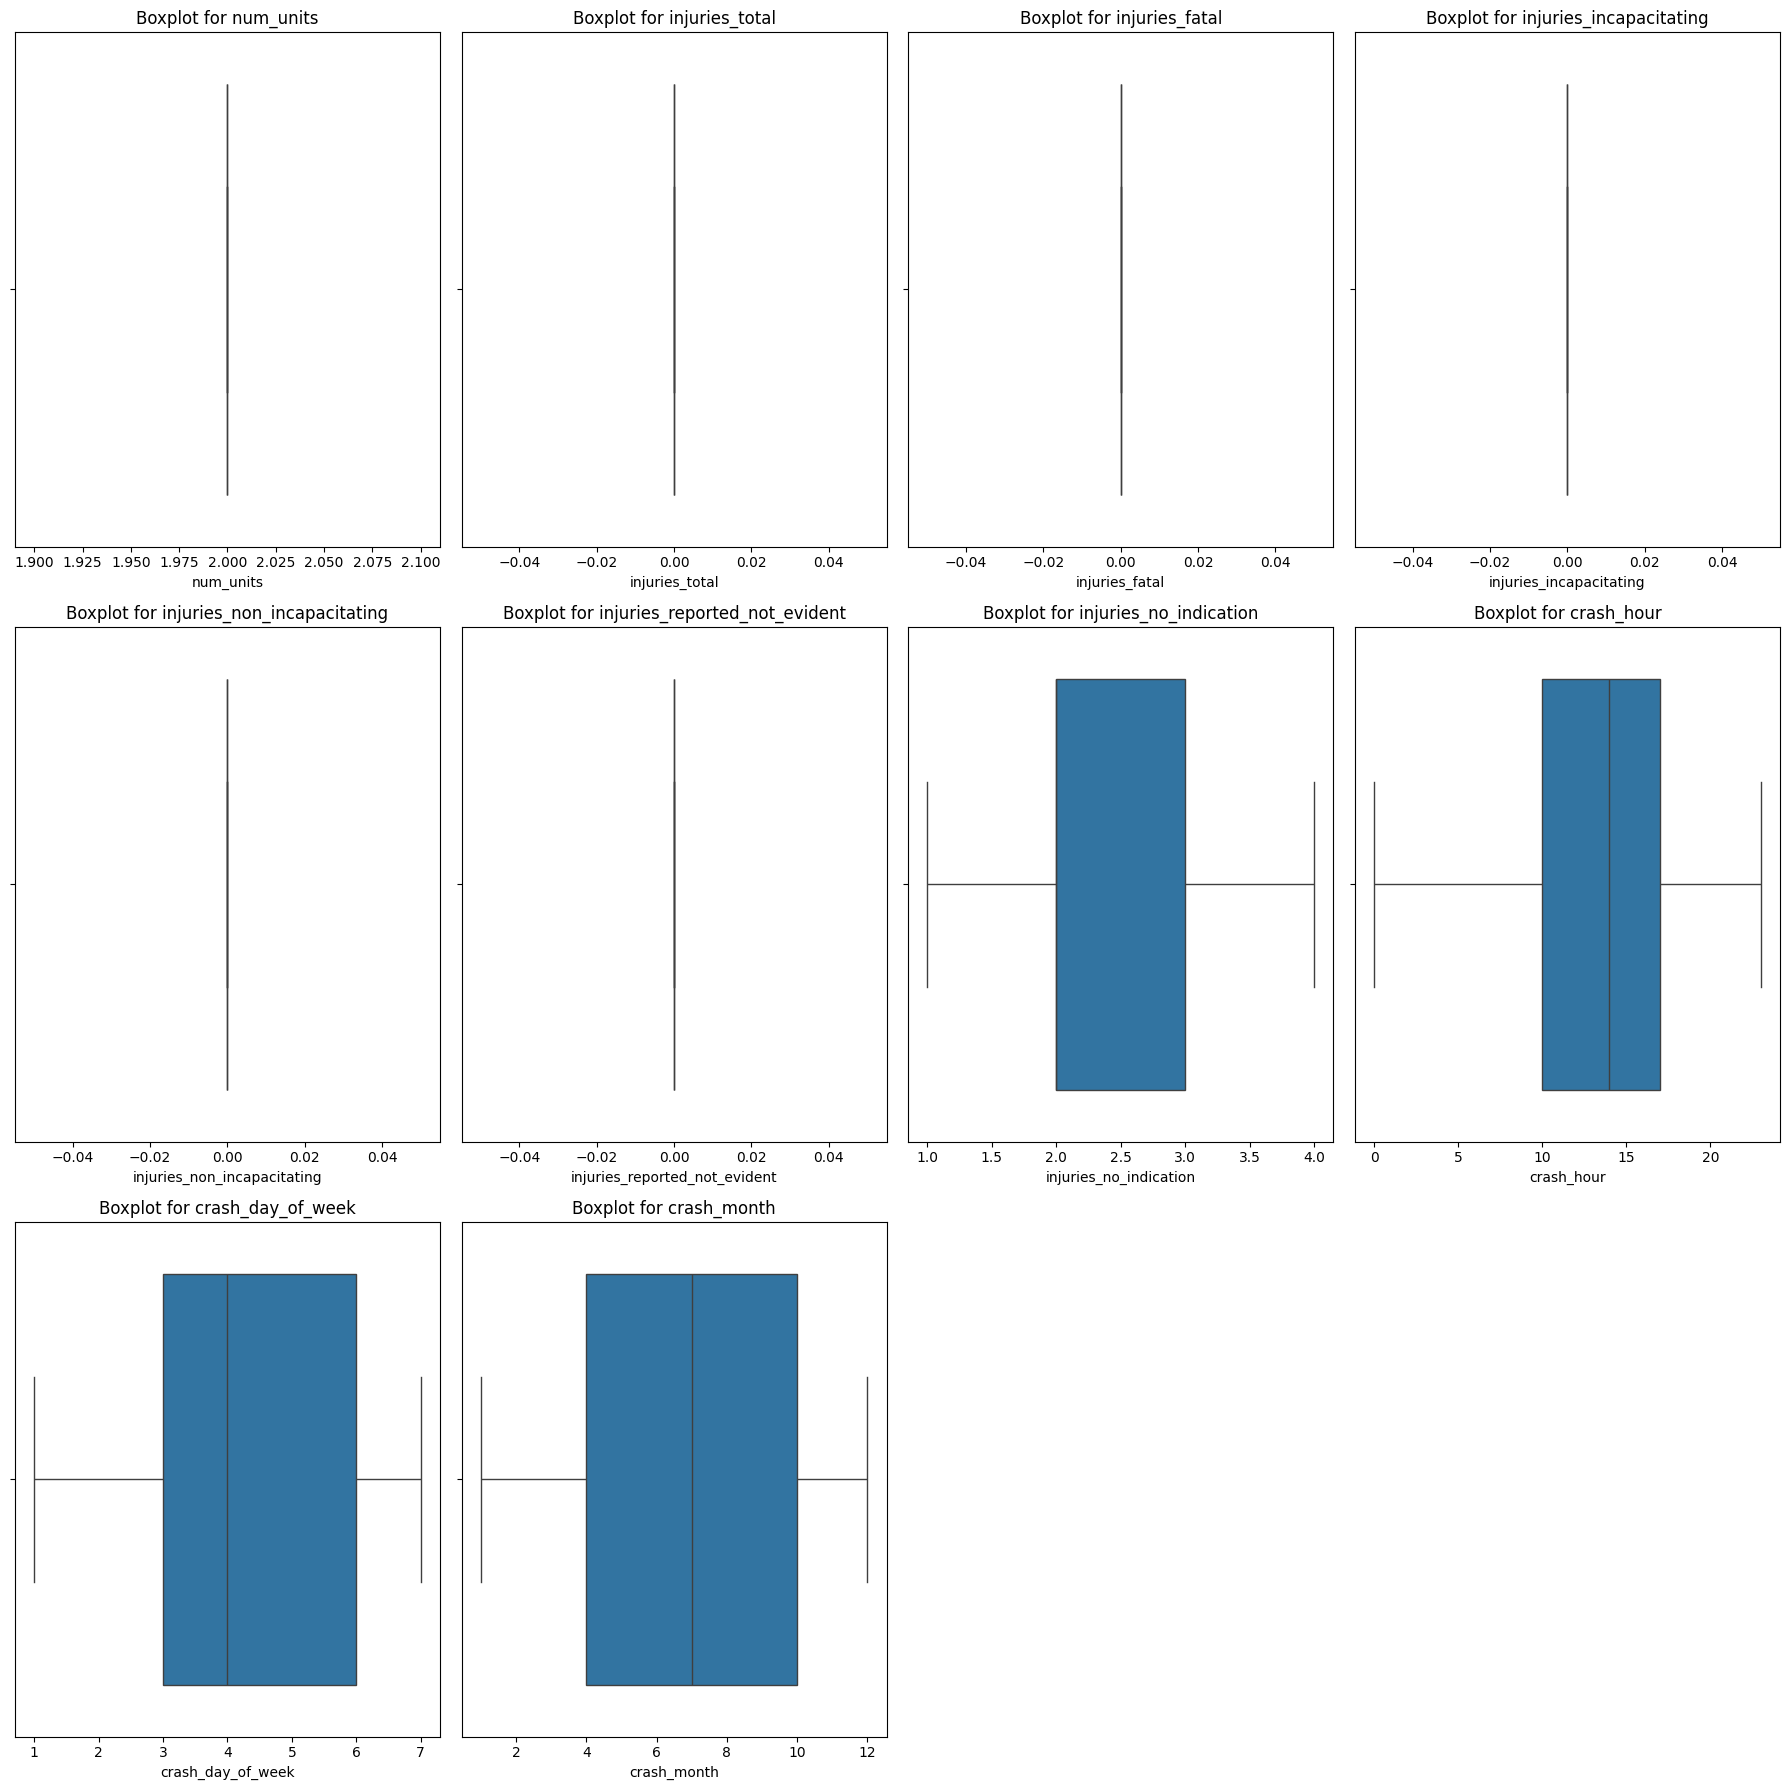

In [158]:
#Outlier Analysis
def remove_outliers(df):
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    num_columns = len(numeric_columns)
    num_per_row = 4 
    num_rows = -(-num_columns // num_per_row)  

    fig, axes = plt.subplots(num_rows, num_per_row, figsize=(18, 6 * num_rows))
    axes = axes.flatten()
    
    for i, column in enumerate(numeric_columns):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
        
        sns.boxplot(x=df[column], ax=axes[i])
        axes[i].set_title(f'Boxplot for {column}')
    
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    return df

df = remove_outliers(df)

In [164]:
#removing unused variables
df = df.drop(columns=['crash_date'])

In [165]:
#Label encoding
encoder = LabelEncoder()

label_mappings = {}

for col in df.select_dtypes('object'):
    df[col] = encoder.fit_transform(df[col])
    label_mappings[col] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

for col, mapping in label_mappings.items():
    print(f"Column: {col}")
    for label, code in mapping.items():
        print(f"{code} -> {label}")
    print()

Column: traffic_control_device
0 -> BICYCLE CROSSING SIGN
1 -> DELINEATORS
2 -> FLASHING CONTROL SIGNAL
3 -> LANE USE MARKING
4 -> NO CONTROLS
5 -> NO PASSING
6 -> OTHER
7 -> OTHER RAILROAD CROSSING
8 -> OTHER REG. SIGN
9 -> OTHER WARNING SIGN
10 -> PEDESTRIAN CROSSING SIGN
11 -> POLICE/FLAGMAN
12 -> RAILROAD CROSSING GATE
13 -> RR CROSSING SIGN
14 -> SCHOOL ZONE
15 -> STOP SIGN/FLASHER
16 -> TRAFFIC SIGNAL
17 -> UNKNOWN
18 -> YIELD

Column: weather_condition
0 -> BLOWING SAND, SOIL, DIRT
1 -> BLOWING SNOW
2 -> CLEAR
3 -> CLOUDY/OVERCAST
4 -> FOG/SMOKE/HAZE
5 -> FREEZING RAIN/DRIZZLE
6 -> OTHER
7 -> RAIN
8 -> SEVERE CROSS WIND GATE
9 -> SLEET/HAIL
10 -> SNOW
11 -> UNKNOWN

Column: lighting_condition
0 -> DARKNESS
1 -> DARKNESS, LIGHTED ROAD
2 -> DAWN
3 -> DAYLIGHT
4 -> DUSK
5 -> UNKNOWN

Column: first_crash_type
0 -> ANGLE
1 -> ANIMAL
2 -> FIXED OBJECT
3 -> HEAD ON
4 -> OTHER NONCOLLISION
5 -> OTHER OBJECT
6 -> OVERTURNED
7 -> PARKED MOTOR VEHICLE
8 -> PEDALCYCLIST
9 -> PEDESTRIAN
10 -

In [166]:
#Train test
from sklearn.model_selection import train_test_split

X = df.drop('crash_type',axis = 1)
y = df['crash_type']

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape,X_test.shape)

(108691, 25) (27173, 25)


Model

In [168]:
loj = LogisticRegression(solver = 'liblinear')
loj_model = loj.fit(X, y)

In [169]:
y_pred = loj_model.predict(X)
lr_accuracy = accuracy_score(y, y_pred)
lr_accuracy

0.7927044691750574

In [177]:
y_train = pd.to_numeric(y_train, errors='raise')


In [179]:
print(y_train.unique())
print(y_train.dtype)


[0 1]
int32


In [ ]:
# Fit the model using the training data
loj_model = loj.fit(X_train, y_train)

Evaluation

In [ ]:
# Make predictions using the test set
y_pred = loj_model.predict(X_test)

# evaluation metrics
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Precision, Recall, F1-Score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification Report
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Precision: 0.7551
Recall: 0.7933
F1-Score: 0.7329

Confusion Matrix:
[[  632  5161]
 [  455 20925]]

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.11      0.18      5793
           1       0.80      0.98      0.88     21380

    accuracy                           0.79     27173
   macro avg       0.69      0.54      0.53     27173
weighted avg       0.76      0.79      0.73     27173



In [ ]:
from sklearn.metrics import precision_recall_curve, auc

# predicted probabilities for class 1
y_probs = best_model.predict_proba(X_test)[:, 1]

# Get precision and recall
precision, recall, _ = precision_recall_curve(y_test, y_probs)

# Precision-Recall AUC
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc}")

from sklearn.model_selection import cross_val_score

# cross-validation
cross_val_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cross_val_scores}")
print(f"Average cross-validation score: {cross_val_scores.mean()}")


Precision-Recall AUC: 0.9183211182893716
Cross-validation scores: [0.79272276 0.79298924 0.79101113 0.79248321 0.79335725]
Average cross-validation score: 0.7925127176119575


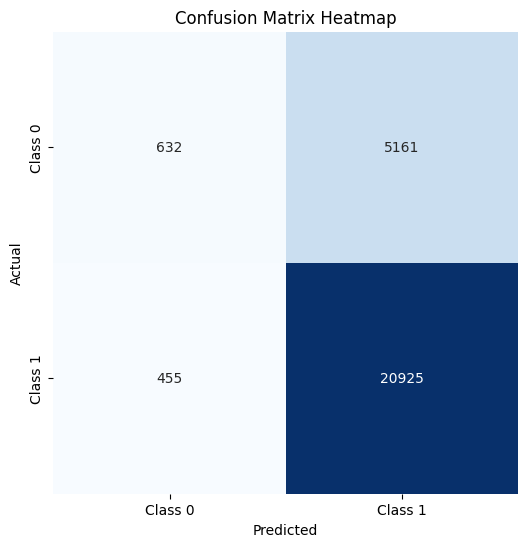

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False, 
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Text(0, 0.5, 'Precision')

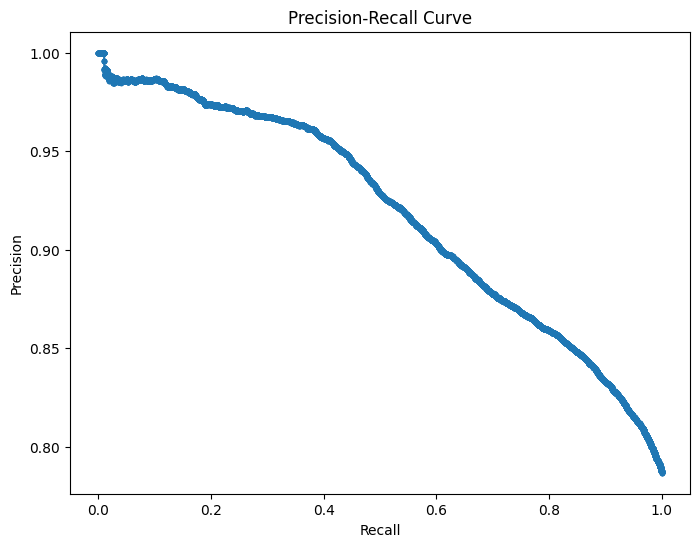

In [ ]:
from sklearn.metrics import precision_recall_curve

# predicted probabilities for class 1
y_probs = best_model.predict_proba(X_test)[:, 1]

# precision and recall
precision, recall, _ = precision_recall_curve(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Precision-Recall curve (AUC = %0.2f)' % pr_auc)
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')

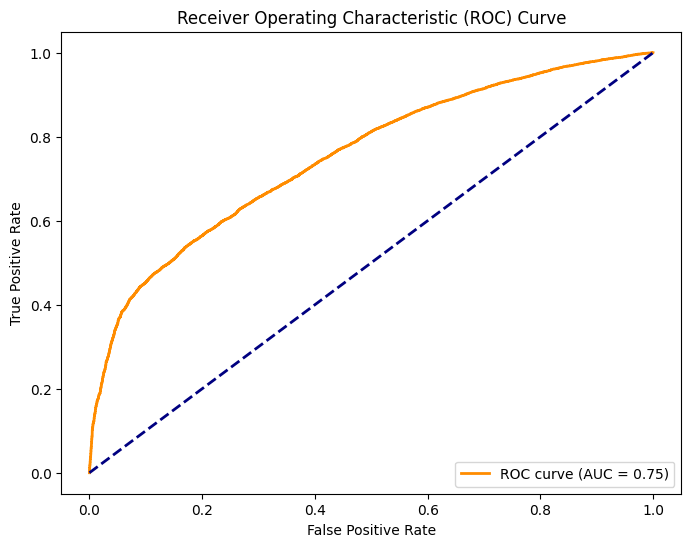

In [ ]:
from sklearn.metrics import roc_curve, auc

# ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


C:\Users\Vrinda\AppData\Local\Temp\ipykernel_24876\449479863.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=predicted_crash_types, palette='Set2')
C:\Users\Vrinda\AppData\Local\Temp\ipykernel_24876\449479863.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=actual_crash_types, palette='Set2')


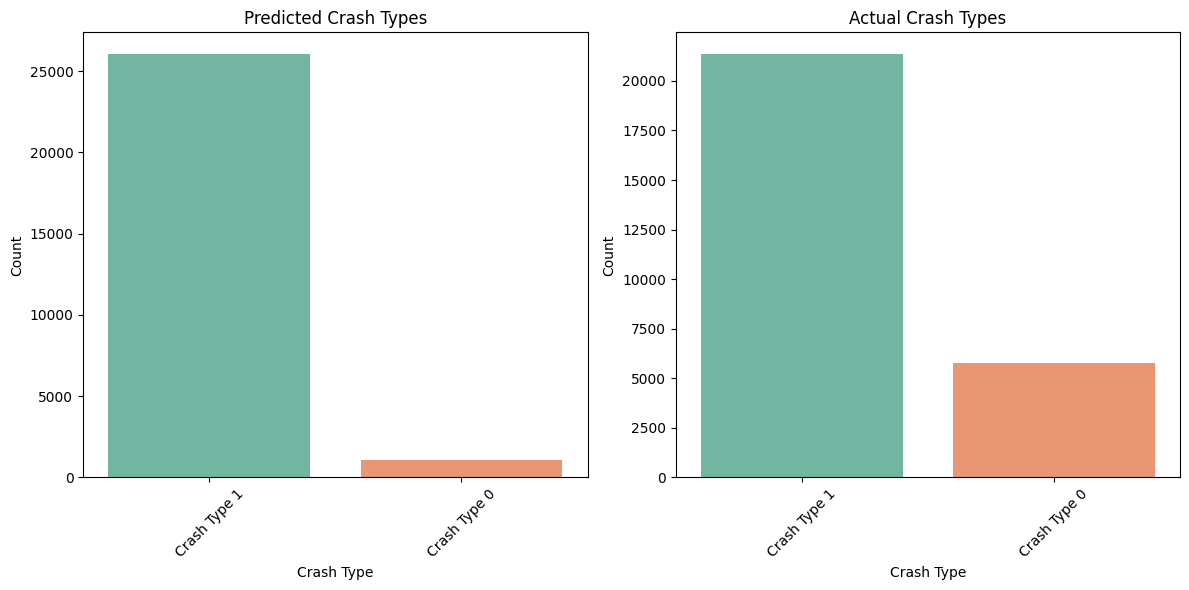

In [ ]:
# actual crash types back to their original labels
actual_crash_types = [label_mappings[label] for label in y_test]


plt.figure(figsize=(12, 6))

# predicted crash types
plt.subplot(1, 2, 1)
sns.countplot(x=predicted_crash_types, palette='Set2')
plt.title('Predicted Crash Types')
plt.xlabel('Crash Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

# actual crash types
plt.subplot(1, 2, 2)
sns.countplot(x=actual_crash_types, palette='Set2')
plt.title('Actual Crash Types')
plt.xlabel('Crash Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


C:\Users\Vrinda\AppData\Local\Temp\ipykernel_24876\2427558955.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=predicted_crash_types, palette='Set2')
C:\Users\Vrinda\AppData\Local\Temp\ipykernel_24876\2427558955.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=actual_crash_types, palette='Set2')


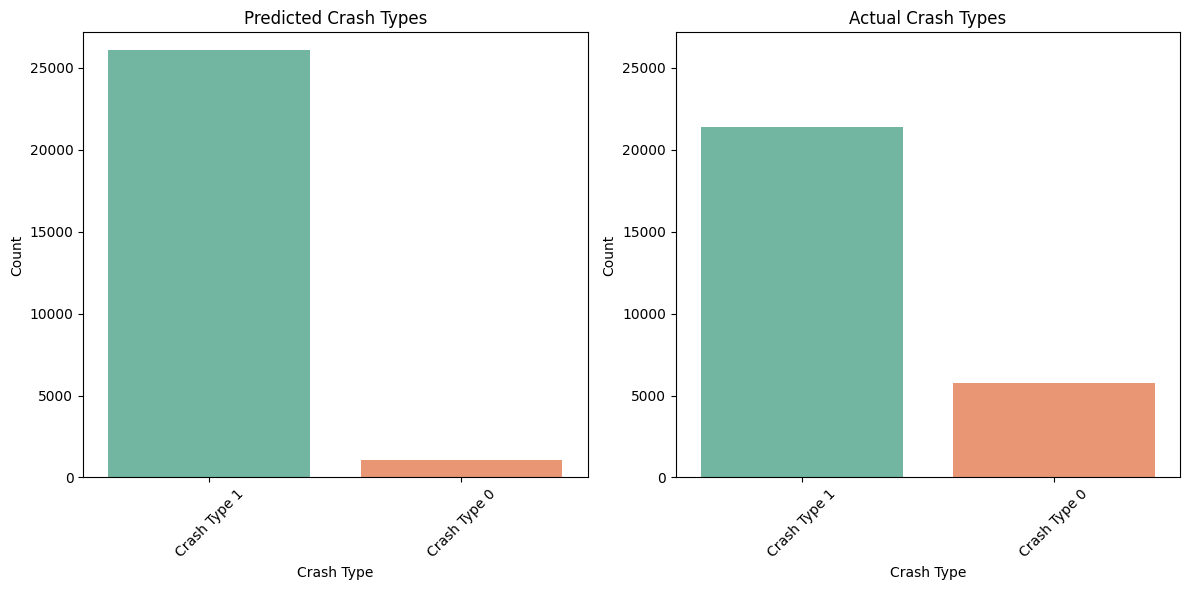

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# predicted crash types
plt.subplot(1, 2, 1)
sns.countplot(x=predicted_crash_types, palette='Set2')
plt.title('Predicted Crash Types')
plt.xlabel('Crash Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

# actual crash types
plt.subplot(1, 2, 2)
sns.countplot(x=actual_crash_types, palette='Set2')
plt.title('Actual Crash Types')
plt.xlabel('Crash Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

max_count = max(len(predicted_crash_types), len(actual_crash_types))  

plt.subplot(1, 2, 1)
plt.ylim(0, max_count)  

plt.subplot(1, 2, 2)
plt.ylim(0, max_count)  
plt.tight_layout()
plt.show()


C:\Users\Vrinda\AppData\Local\Temp\ipykernel_24876\4072123788.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=predicted_crash_types, palette='Set2')
C:\Users\Vrinda\AppData\Local\Temp\ipykernel_24876\4072123788.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=actual_crash_types, palette='Set2')


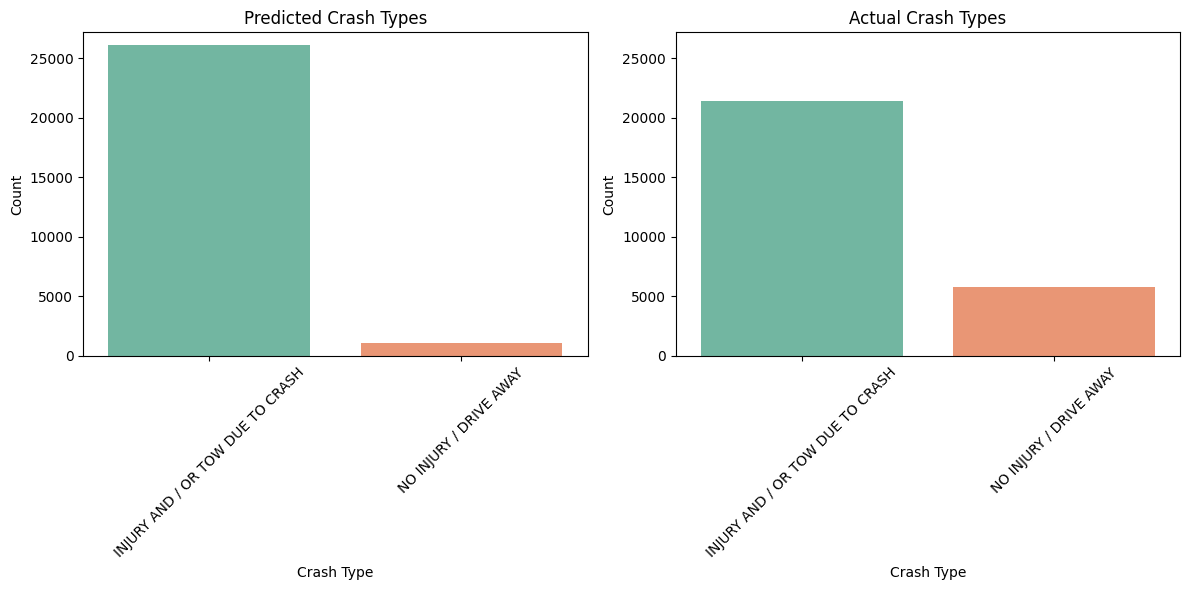

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

label_mappings = {0: "NO INJURY / DRIVE AWAY", 1: "INJURY AND / OR TOW DUE TO CRASH"}

# Map predicted and actual values to the actual labels
predicted_crash_types = [label_mappings[label] for label in y_pred_best]
actual_crash_types = [label_mappings[label] for label in y_test]

plt.figure(figsize=(12, 6))

# predicted crash types
plt.subplot(1, 2, 1)
sns.countplot(x=predicted_crash_types, palette='Set2')
plt.title('Predicted Crash Types')
plt.xlabel('Crash Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

# actual crash types
plt.subplot(1, 2, 2)
sns.countplot(x=actual_crash_types, palette='Set2')
plt.title('Actual Crash Types')
plt.xlabel('Crash Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

max_count = max(len(predicted_crash_types), len(actual_crash_types)) 

plt.subplot(1, 2, 1)
plt.ylim(0, max_count)  

plt.subplot(1, 2, 2)
plt.ylim(0, max_count)  

plt.tight_layout()
plt.show()
